In [14]:
#week1
import pandas as pd
import numpy as np
data = pd.read_csv("enjoysport.csv") 
print(data)
attr = np.array(data)[:,:-1] 
print(" The attributes are: ",attr)
trg = np.array(data)[:,-1] 
print("The target is: ",trg)
def train(attr,trg): 
    for i, val in enumerate(trg): 
        if val == "yes": 
            specific_hypothesis = attr[i].copy() 
            break
    for i, val in enumerate(attr): 
        if trg[i] == "yes": 
            for x in range(len(specific_hypothesis)): 
                if val[x] != specific_hypothesis[x]: 
                    specific_hypothesis[x] = '?'
                else: 
                    pass
    return specific_hypothesis
hyp=train(attr,trg)
print(" The final hypothesis is:",hyp)

     sky air_temp humidity    wind water forecast enjoy_sport
0  sunny     warm   normal  strong  warm     same         yes
1  sunny     warm     high  strong  warm     same         yes
2  rainy     cold     high  strong  warm   change          no
3  sunny     warm     high  strong  cool   change         yes
 The attributes are:  [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
The target is:  ['yes' 'yes' 'no' 'yes']
 The final hypothesis is: ['sunny' 'warm' '?' 'strong' '?' '?']


In [15]:
#week2
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'
                print(specific_h)
        print(specific_h)
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print(" steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 steps of Candidate Elimination Algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '

In [ ]:
#week3
import pandas as pd 
import numpy as np 
train_data_m = pd.read_csv("enjoytennis.csv") 

train_data_m.head()

def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] 
    total_entr = 0
    
    for c in class_list: 
        total_class_count = train_data[train_data[label] == c].shape[0] 
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) 
        total_entr += total_class_entr 
    
    return total_entr

def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count 
            entropy_class = - probability_class * np.log2(probability_class)  
        entropy += entropy_class
    return entropy
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() 
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) 
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy 
        
    return calc_total_entropy(train_data, label, class_list) - feature_info 
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) 
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: 
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) 
    tree = {} 
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        
        assigned_to_node = False 
        for c in class_list: 
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] 

            if class_count == count: 
                tree[feature_value] = c 
                train_data = train_data[train_data[feature_name] != feature_value] 
                assigned_to_node = True
        if not assigned_to_node: 
            tree[feature_value] = "?" 
            
    return tree, train_data
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: 
        max_info_feature = find_most_informative_feature(train_data, label, class_list) 
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) 
        next_root = None
        
        if prev_feature_value != None: 
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: 
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): 
            if branch == "?": 
                feature_value_data = train_data[train_data[max_info_feature] == node] 
                make_tree(next_root, node, feature_value_data, label, class_list) 
def id3(train_data_m, label):
    train_data = train_data_m.copy() 
    tree = {} 
    class_list = train_data[label].unique() 
    make_tree(tree, None, train_data, label, class_list) 
    return tree
tree = id3(train_data_m, 'Play Tennis')
def predict(tree, instance):
    if not isinstance(tree, dict): 
        return tree 
    else:
        root_node = next(iter(tree)) 
        feature_value = instance[root_node] 
        if feature_value in tree[root_node]: 
            return predict(tree[root_node][feature_value], instance) 
        else:
            return None
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): 
        result = predict(tree, test_data_m.iloc[index]) 
        if result == test_data_m[label].iloc[index]: 
            correct_preditct += 1 
        else:
            wrong_preditct += 1 
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) 
    return accuracy
accuracy = evaluate(tree, train_data_m, 'Play Tennis')
print('accuracy:',accuracy)
print('tree:',tree)

In [ ]:
#week4
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad

    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87500196]
 [0.86601241]
 [0.87785789]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87513668]
 [0.86614377]
 [0.87799085]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87527012]
 [0.86627389]
 [0.87812255]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87540229]
 [0.86640279]
 [0.878

In [34]:
#week5
import pandas as pd
import numpy as np

data=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/IRIS.csv')
data.head()
data.columns

X=data.drop('species',axis=1)
y=data['species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score:\n',accuracy_score(y_test,y_pred))

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)
Accuracy score:
 1.0


In [9]:
#week6
import pandas as pd

msg=pd.read_csv('/naivetext.csv',names=['message','label'])
print('The dimensions of the dataset',msg.shape)

msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
print(X)
print(y)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print ('\n The total number of Training Data :',ytrain.shape)
print ('\n The total number of Test Data :',ytest.shape)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)

print('\n The words or Tokens in the text documents \n')
print(count_vect.get_feature_names_out())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names_out())

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy score:',accuracy_score(ytest,predicted))
print('Confusion matrix:\n',confusion_matrix(ytest,predicted))
print('Precision score:',precision_score(ytest,predicted))
print('Recall score:',recall_score(ytest,predicted))

The dimensions of the dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17   

In [16]:
#week7
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('/heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

print('Sample instances from the dataset are given below')
print(heartDisease.head())

print('\n Attributes and datatypes')
print(heartDisease.dtypes)

model =BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),
('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])

print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

print('1.Probability of HeartDisease given evidence=restecg :1')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

print('\n 2.Probability of HeartDisease given evidence= cp:2 ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans:
Accuracy score: 0.24
Confusion matrix
: [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
GMM:
Accuracy score: 0.36666666666666664
Confusion matrix
: [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


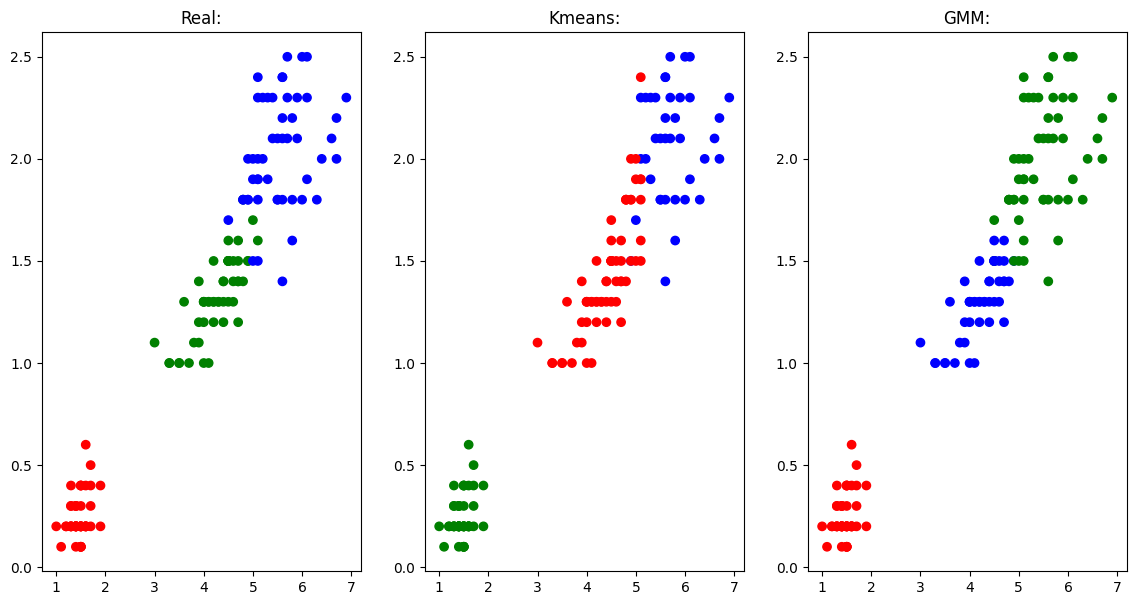

In [26]:
#week8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/IRIS.csv')
data.head()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

X=data.drop(['species'],axis=1)
y=data['species']

plt.figure(figsize=(14,7))
colors=np.array(['red','green','blue'])
plt.subplot(1,3,1)
plt.title('Real:')
plt.scatter(X.petal_length,X.petal_width,c=colors[y])

from sklearn.cluster import KMeans
model1=KMeans(n_clusters=3,random_state=0)
model1.fit(X)
y_pred1=model1.labels_
plt.subplot(1,3,2)
plt.title("Kmeans:")
plt.scatter(X.petal_length,X.petal_width,c=colors[y_pred1])

from sklearn.metrics import accuracy_score,confusion_matrix
print('Kmeans:')
print('Accuracy score:',accuracy_score(y,y_pred1))
print('Confusion matrix\n:',confusion_matrix(y,y_pred1))

from sklearn.mixture import GaussianMixture
model2=GaussianMixture(n_components=3,random_state=0)
model2.fit(X)
y_pred2=model2.predict(X)
plt.subplot(1,3,3)
plt.title('GMM:')
plt.scatter(X.petal_length,X.petal_width,c=colors[y_pred2])

print('GMM:')
print('Accuracy score:',accuracy_score(y,y_pred2))
print('Confusion matrix\n:',confusion_matrix(y,y_pred2))

In [29]:
#week9
import pandas as pd
import numpy as np

data=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/IRIS.csv')
data.head()
data.columns

X=data.drop('species',axis=1)
y=data['species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score:\n',accuracy_score(y_test,y_pred))

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)
Accuracy score:
 0.9777777777777777


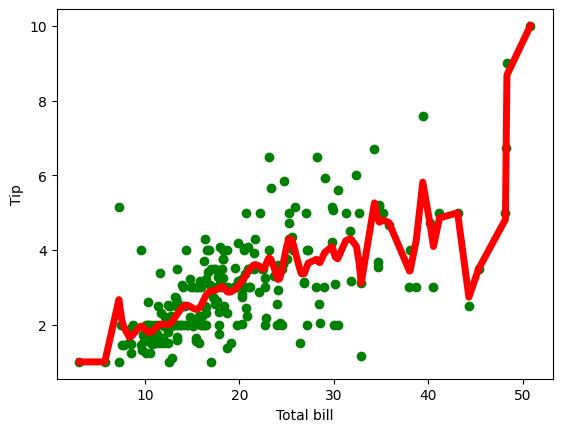

In [31]:
#week10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

# load data points
data = pd.read_csv('/10-dataset.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()